In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import trange
import ROOT
import os,sys
from array import array
import time

Welcome to JupyROOT 6.22/06


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.4
lumiTextOffset   = 0.2

cmsTextSize      = 0.35
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "59.7 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_*1.20, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.11)
tdrStyle.SetPadBottomMargin(0.11)
tdrStyle.SetPadLeftMargin(0.11)
tdrStyle.SetPadRightMargin(0.11)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(1.1)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## ratio function

In [4]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.80)
    h3.SetMaximum(1.53)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(105)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(20)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(20)

    return h3


## Control pad 

In [32]:
# 0: WZG
# 1: WZG_emm
# 2: WZG_mee
# 3: WZG_eee
# 4: WZG_mmm

# 10: ttZ
# 11: ttZ_emm
# 12: ttZ_mee
# 13: ttZ_eee
# 14: ttZ_mmm

# 9: ZZ
# 5: ZZ_eemm
# 6: ZZ_mmee
# 7: ZZ_eeee
# 8: ZZ_mmmm     


branch = {
    "ZZ_mllz1":{
        "name":"ZZ_mllz1",
        "axis_name":"ZZ m_{l_{Z1}l_{Z2}} [GeV]",
        "xbins":10,
        "xleft":70,
        "xright":110,
    },
#     "ttZ_dileptonmass":{
#         "name":"ttZ_dileptonmass",
#         "axis_name":"m_{Z} [GeV]",
#         "xbins":10,
#         "xleft":70,
#         "xright":110,
#     },
#     "ttZ_trileptonmass":{
#         "name":"ttZ_trileptonmass",
#         "axis_name":"m_{WZ} [GeV]",
#         "xbins":10,
#         "xleft":100,
#         "xright":200,
#     },
    "MET":{
        "name":"MET",
        "axis_name":"MET [GeV]",
        "xbins":10,
        "xleft":0,
        "xright":100,
    },
    "nJets":{
        "name":"nJets",
        "axis_name":"nJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
    "nbJets":{
        "name":"nbJets",
        "axis_name":"nbJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
}

channel = 10
lumi = 59.7



## Add Hist 

In [33]:
def AddHist(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_lepton_branches)
        init_branches.extend(gen_photon_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (branches.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (branches.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (branches.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & lep_gen_cut,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))
        

### Add Data 

In [34]:
filelist_data = [
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root",
]

hist_data = {}

for branch_name in branch:
    hist_data_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_data_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_data_temp.SetYTitle(f'events / bin')
    hist_data_temp.Sumw2()
    hist_data[branch_name] = hist_data_temp

In [35]:
for file in filelist_data:
    AddHist(file, hist_data, 1, 0, 0, channel, branch)

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 170/170 [00:00<00:00, 157124.65it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 170/170 [00:00<00:00, 163689.55it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 170/170 [00:00<00:00, 160737.53it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 170/170 [00:00<00:00, 165782.77it/s]


SumOfWeights for ZZ_mllz1:  24.0
SumOfWeights for MET:  121.0
SumOfWeights for nJets:  163.0
SumOfWeights for nbJets:  170.0
Time cost: 4.90

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 84/84 [00:00<00:00, 139976.77it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 84/84 [00:00<00:00, 130248.26it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 84/84 [00:00<00:00, 90992.13it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 84/84 [00:00<00:00, 134268.88it/s]


SumOfWeights for ZZ_mllz1:  35.0
SumOfWeights for MET:  189.0
SumOfWeights for nJets:  244.0
SumOfWeights for nbJets:  254.0
Time cost: 4.12

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 98/98 [00:00<00:00, 147538.33it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 98/98 [00:00<00:00, 149252.65it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 98/98 [00:00<00:00, 150234.57it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 98/98 [00:00<00:00, 128330.25it/s]


SumOfWeights for ZZ_mllz1:  51.0
SumOfWeights for MET:  265.0
SumOfWeights for nJets:  335.0
SumOfWeights for nbJets:  352.0
Time cost: 2.61

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 250/250 [00:00<00:00, 169207.04it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 250/250 [00:00<00:00, 166678.75it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 250/250 [00:00<00:00, 168229.74it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 250/250 [00:00<00:00, 170168.13it/s]


SumOfWeights for ZZ_mllz1:  79.0
SumOfWeights for MET:  445.0
SumOfWeights for nJets:  572.0
SumOfWeights for nbJets:  602.0
Time cost: 3.68

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 148/148 [00:00<00:00, 158275.62it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 148/148 [00:00<00:00, 160942.96it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 148/148 [00:00<00:00, 128867.97it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 148/148 [00:00<00:00, 153881.26it/s]


SumOfWeights for ZZ_mllz1:  95.0
SumOfWeights for MET:  560.0
SumOfWeights for nJets:  712.0
SumOfWeights for nbJets:  750.0
Time cost: 3.45

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 7/7 [00:00<00:00, 34460.24it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 7/7 [00:00<00:00, 43367.99it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 7/7 [00:00<00:00, 38279.18it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 7/7 [00:00<00:00, 44620.26it/s]


SumOfWeights for ZZ_mllz1:  96.0
SumOfWeights for MET:  566.0
SumOfWeights for nJets:  718.0
SumOfWeights for nbJets:  757.0
Time cost: 4.38

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  96.0
SumOfWeights for MET:  566.0
SumOfWeights for nJets:  718.0
SumOfWeights for nbJets:  757.0
Time cost: 3.24

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  96.0
SumOfWeights for MET:  566.0
SumOfWeights for nJets:  718.0
SumOfWeights for nbJets:  757.0
Time cost: 2.78

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 21140.65it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 22262.76it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 26280.10it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 25115.59it/s]


SumOfWeights for ZZ_mllz1:  96.0
SumOfWeights for MET:  570.0
SumOfWeights for nJets:  722.0
SumOfWeights for nbJets:  762.0
Time cost: 3.63

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 21648.02it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 20360.70it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 23045.63it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 23237.14it/s]


SumOfWeights for ZZ_mllz1:  97.0
SumOfWeights for MET:  572.0
SumOfWeights for nJets:  726.0
SumOfWeights for nbJets:  766.0
Time cost: 3.03

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 60/60 [00:00<00:00, 112397.61it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 60/60 [00:00<00:00, 111897.84it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 60/60 [00:00<00:00, 111156.47it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 60/60 [00:00<00:00, 111107.39it/s]


SumOfWeights for ZZ_mllz1:  107.0
SumOfWeights for MET:  622.0
SumOfWeights for nJets:  784.0
SumOfWeights for nbJets:  826.0
Time cost: 3.86

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 70654.43it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 72145.96it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 71199.60it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 82241.25it/s]


SumOfWeights for ZZ_mllz1:  112.0
SumOfWeights for MET:  636.0
SumOfWeights for nJets:  806.0
SumOfWeights for nbJets:  848.0
Time cost: 2.60

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 25/25 [00:00<00:00, 86019.36it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 25/25 [00:00<00:00, 97541.95it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 25/25 [00:00<00:00, 99203.03it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 25/25 [00:00<00:00, 92712.29it/s]


SumOfWeights for ZZ_mllz1:  115.0
SumOfWeights for MET:  652.0
SumOfWeights for nJets:  829.0
SumOfWeights for nbJets:  873.0
Time cost: 2.86

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 80/80 [00:00<00:00, 127438.03it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 80/80 [00:00<00:00, 119029.56it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 80/80 [00:00<00:00, 139635.59it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 80/80 [00:00<00:00, 136566.67it/s]


SumOfWeights for ZZ_mllz1:  126.0
SumOfWeights for MET:  715.0
SumOfWeights for nJets:  903.0
SumOfWeights for nbJets:  953.0
Time cost: 3.33

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 43/43 [00:00<00:00, 103355.34it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 43/43 [00:00<00:00, 111813.44it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 43/43 [00:00<00:00, 112792.42it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 43/43 [00:00<00:00, 71484.37it/s]


SumOfWeights for ZZ_mllz1:  128.0
SumOfWeights for MET:  748.0
SumOfWeights for nJets:  945.0
SumOfWeights for nbJets:  996.0
Time cost: 2.86

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  128.0
SumOfWeights for MET:  748.0
SumOfWeights for nJets:  945.0
SumOfWeights for nbJets:  996.0
Time cost: 3.19

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 6990.51it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 6721.64it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9510.89it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9664.29it/s]


SumOfWeights for ZZ_mllz1:  128.0
SumOfWeights for MET:  748.0
SumOfWeights for nJets:  946.0
SumOfWeights for nbJets:  997.0
Time cost: 2.73

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 9675.44it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 11602.50it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 11634.69it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 12409.18it/s]


SumOfWeights for ZZ_mllz1:  128.0
SumOfWeights for MET:  749.0
SumOfWeights for nJets:  948.0
SumOfWeights for nbJets:  999.0
Time cost: 2.38

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 17307.99it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 19210.55it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 19691.57it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 23344.92it/s]

SumOfWeights for ZZ_mllz1:  130.0
SumOfWeights for MET:  752.0
SumOfWeights for nJets:  951.0
SumOfWeights for nbJets:  1002.0
Time cost: 2.48



### Add MC 

In [36]:
filelist_MC = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root", 
        "xsec":4.078,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root", 
        "xsec":0.2432,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root", 
        "xsec":0.2149,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root", 
        "xsec":0.07358,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root", 
        "xsec":0.2086,
        "color":7},
   "WZ":
        {"name":"WZ", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root", 
        "xsec":27.6,
        "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root", 
        "xsec":55.48,
        "color":9},
    "ZZ":
        {"name":"ZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root",
        "xsec":12.14,
        "color":12},
    "WZG":
        {"name":"WZG",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root",
        "xsec":0.0384,
        "color":21}
}


In [37]:
def SetHistStyle(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetFillColor(color)
    hist.SetYTitle('events/bin')
    hist.SetStats(0)
    hist.Sumw2()
    
    
for file in filelist_MC:
    hist_MC = {}
    for branch_name in branch:
        hist_MC_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
        SetHistStyle(hist_MC_temp, filelist_MC[file]["color"])
        hist_MC_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
        hist_MC[branch_name] = hist_MC_temp
        
    AddHist(filelist_MC[file]["path"], hist_MC, 0, filelist_MC[file]["xsec"], lumi, channel, branch)
    filelist_MC[file]["hist"] = hist_MC
    

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 201/201 [00:00<00:00, 97711.53it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 201/201 [00:00<00:00, 100976.78it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 201/201 [00:00<00:00, 101487.31it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 201/201 [00:00<00:00, 101536.20it/s]


SumOfWeights for ZZ_mllz1:  3.5179003477096558
SumOfWeights for MET:  7.182380139827728
SumOfWeights for nJets:  12.166073232889175
SumOfWeights for nbJets:  11.872913599014282
Time cost: 7.03

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 182529/182529 [00:01<00:00, 94769.97it/s] 
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▌         | 9616/182529 [00:00<00:01, 96145.42it/s]

SumOfWeights for ZZ_mllz1:  190.5847026631236


fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 182529/182529 [00:02<00:00, 88198.25it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▌         | 10659/182529 [00:00<00:01, 106576.89it/s]

SumOfWeights for MET:  127.46284675598145


fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 182529/182529 [00:01<00:00, 103117.54it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▌         | 9558/182529 [00:00<00:01, 95564.14it/s]

SumOfWeights for nJets:  179.05600726604462


fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 182529/182529 [00:01<00:00, 104973.84it/s]


SumOfWeights for nbJets:  191.07351367757656
Time cost: 15.47

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5729/5729 [00:00<00:00, 93622.20it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5729/5729 [00:00<00:00, 78437.74it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5729/5729 [00:00<00:00, 107075.65it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5729/5729 [00:00<00:00, 94442.77it/s]

SumOfWeights for ZZ_mllz1:  13.185994684696198
SumOfWeights for MET:  8.296617269515991
SumOfWeights for nJets:  15.125542402267456


SumOfWeights for nbJets:  15.321036262903363
Time cost: 7.15

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 218662/218662 [00:02<00:00, 104167.18it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▍         | 10409/218662 [00:00<00:02, 104079.68it/s]

SumOfWeights for ZZ_mllz1:  75.48684853315353


fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 218662/218662 [00:02<00:00, 81972.93it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▍         | 10678/218662 [00:00<00:01, 106761.77it/s]

SumOfWeights for MET:  58.84175682067871


fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 218662/218662 [00:02<00:00, 93119.34it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▍         | 10791/218662 [00:00<00:01, 107898.78it/s]

SumOfWeights for nJets:  76.71618264913559


fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 218662/218662 [00:02<00:00, 92048.96it/s]


SumOfWeights for nbJets:  77.11361713334918
Time cost: 17.62

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 3890.82it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 8848.74it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 7530.17it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 5809.29it/s]


SumOfWeights for ZZ_mllz1:  0.0
SumOfWeights for MET:  0.05927377566695213
SumOfWeights for nJets:  0.05927377566695213
SumOfWeights for nbJets:  0.05927377566695213
Time cost: 6.80

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 99/99 [00:00<00:00, 73350.31it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 99/99 [00:00<00:00, 77411.65it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 99/99 [00:00<00:00, 79273.79it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 99/99 [00:00<00:00, 89106.46it/s]


SumOfWeights for ZZ_mllz1:  2.475912392139435
SumOfWeights for MET:  15.887104153633118
SumOfWeights for nJets:  20.42627704143524
SumOfWeights for nbJets:  20.426285982131958
Time cost: 8.36

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 50/50 [00:00<00:00, 67023.07it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 50/50 [00:00<00:00, 82144.61it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 50/50 [00:00<00:00, 79078.13it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 50/50 [00:00<00:00, 56910.50it/s]


SumOfWeights for ZZ_mllz1:  0.5493021607398987
SumOfWeights for MET:  2.5634100288152695
SumOfWeights for nJets:  2.5634100288152695
SumOfWeights for nbJets:  2.5634101033210754
Time cost: 7.14

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 16/16 [00:00<00:00, 28679.00it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 16/16 [00:00<00:00, 53473.20it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 16/16 [00:00<00:00, 60025.82it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 16/16 [00:00<00:00, 55188.21it/s]


SumOfWeights for ZZ_mllz1:  5.7980645298957825
SumOfWeights for MET:  5.4356852769851685
SumOfWeights for nJets:  5.798064410686493
SumOfWeights for nbJets:  5.798064589500427
Time cost: 6.81

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 42/42 [00:00<00:00, 65682.61it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 42/42 [00:00<00:00, 82164.54it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 42/42 [00:00<00:00, 79315.97it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 42/42 [00:00<00:00, 86480.49it/s]

SumOfWeights for ZZ_mllz1:  0.7139776088297367
SumOfWeights for MET:  0.6119807995855808
SumOfWeights for nJets:  0.7139776051044464
SumOfWeights for nbJets:  0.7751753609627485
Time cost: 7.38



## Add FakeLepton

In [38]:
def AddHist_FakeLepton(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['fake_lepton_weight','channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (branches.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (branches.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (branches.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & lep_gen_cut,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['fake_lepton_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), -1 * float(arrays['fake_lepton_weight'].values[i]) * float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))
        

#### Add Data 

In [39]:
filelist_data_FakeLep = [
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root",
]

hist_FakeLep = {}

for branch_name in branch:
    hist_FakeLep_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_FakeLep_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_FakeLep_temp.SetYTitle(f'events / bin')
    hist_FakeLep_temp.SetFillColor(23) 
    hist_FakeLep_temp.SetMarkerStyle(20)
    hist_FakeLep_temp.SetMarkerColor(23)
    hist_FakeLep_temp.SetStats(0)
    hist_FakeLep_temp.Sumw2()
    hist_FakeLep[branch_name] = hist_FakeLep_temp
    

In [40]:
for file in filelist_data_FakeLep:
    AddHist_FakeLepton(file, hist_FakeLep, 1, 0, 0, channel, branch)

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 108186.79it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 111729.03it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 92328.48it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 563/563 [00:00<00:00, 108915.32it/s]


SumOfWeights for ZZ_mllz1:  23.276665806770325
SumOfWeights for MET:  104.13523292541504
SumOfWeights for nJets:  130.00534915924072
SumOfWeights for nbJets:  127.34128260612488
Time cost: 2.57

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 101572.02it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 105249.27it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 107116.45it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 262/262 [00:00<00:00, 106061.93it/s]


SumOfWeights for ZZ_mllz1:  38.93348342180252
SumOfWeights for MET:  160.34741401672363
SumOfWeights for nJets:  208.90447807312012
SumOfWeights for nbJets:  207.67103099822998
Time cost: 2.06

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 85373.23it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 91472.74it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 90657.79it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 279/279 [00:00<00:00, 106518.37it/s]


SumOfWeights for ZZ_mllz1:  43.92805427312851
SumOfWeights for MET:  224.00262832641602
SumOfWeights for nJets:  291.72293519973755
SumOfWeights for nbJets:  293.3624350428581
Time cost: 2.16

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 109982.13it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 82384.06it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 13527.17it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 690/690 [00:00<00:00, 57645.05it/s]


SumOfWeights for ZZ_mllz1:  75.12549024820328
SumOfWeights for MET:  391.3109531402588
SumOfWeights for nJets:  489.89856910705566
SumOfWeights for nbJets:  494.57697081565857
Time cost: 3.25

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 105666.14it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 103760.60it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 100936.86it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 428/428 [00:00<00:00, 104182.12it/s]


SumOfWeights for ZZ_mllz1:  102.3429165482521
SumOfWeights for MET:  513.8462982177734
SumOfWeights for nJets:  639.2631664276123
SumOfWeights for nbJets:  646.6173236370087
Time cost: 2.58

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 56196.52it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 75842.21it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 74736.52it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 33/33 [00:00<00:00, 75676.34it/s]


SumOfWeights for ZZ_mllz1:  101.64275866746902
SumOfWeights for MET:  520.0347480773926
SumOfWeights for nJets:  645.2683162689209
SumOfWeights for nbJets:  652.6226871013641
Time cost: 2.95

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 27945.09it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 42211.66it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 38934.47it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 44320.22it/s]


SumOfWeights for ZZ_mllz1:  101.36348468065262
SumOfWeights for MET:  519.7431945800781
SumOfWeights for nJets:  642.8153629302979
SumOfWeights for nbJets:  650.1698443889618
Time cost: 2.29

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 25266.89it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 27654.75it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 37338.02it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 41803.69it/s]


SumOfWeights for ZZ_mllz1:  101.35891991853714
SumOfWeights for MET:  518.563892364502
SumOfWeights for nJets:  642.020206451416
SumOfWeights for nbJets:  649.3746783733368
Time cost: 2.41

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 54760.39it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 84894.20it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 75192.00it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 32/32 [00:00<00:00, 78444.03it/s]


SumOfWeights for ZZ_mllz1:  100.66996175050735
SumOfWeights for MET:  524.4991989135742
SumOfWeights for nJets:  645.5120620727539
SumOfWeights for nbJets:  653.1840291023254
Time cost: 2.24

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 23140.99it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 37701.61it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 34663.67it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 34592.20it/s]


SumOfWeights for ZZ_mllz1:  100.66996175050735
SumOfWeights for MET:  523.7303581237793
SumOfWeights for nJets:  645.0353736877441
SumOfWeights for nbJets:  652.7072834968567
Time cost: 2.17

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 68617.77it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 102187.38it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 90097.85it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 199/199 [00:00<00:00, 100890.43it/s]


SumOfWeights for ZZ_mllz1:  106.98445159196854
SumOfWeights for MET:  572.6857528686523
SumOfWeights for nJets:  705.2363300323486
SumOfWeights for nbJets:  714.9230351448059
Time cost: 2.34

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 75641.19it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 86748.79it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 97383.42it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 100/100 [00:00<00:00, 94445.03it/s]


SumOfWeights for ZZ_mllz1:  109.01036864519119
SumOfWeights for MET:  598.1960525512695
SumOfWeights for nJets:  739.3683338165283
SumOfWeights for nbJets:  747.9687085151672
Time cost: 2.29

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 85903.63it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 86554.17it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 69628.26it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 109/109 [00:00<00:00, 85262.80it/s]


SumOfWeights for ZZ_mllz1:  110.37111312150955
SumOfWeights for MET:  624.8629989624023
SumOfWeights for nJets:  771.4397106170654
SumOfWeights for nbJets:  780.4087071418762
Time cost: 2.65

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 104891.22it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 83351.77it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 91136.07it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 312/312 [00:00<00:00, 65228.93it/s]


SumOfWeights for ZZ_mllz1:  118.64055180549622
SumOfWeights for MET:  698.6295852661133
SumOfWeights for nJets:  858.8574619293213
SumOfWeights for nbJets:  869.2902064323425
Time cost: 2.62

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 94828.83it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 101631.47it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 100288.53it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 152/152 [00:00<00:00, 96043.12it/s]


SumOfWeights for ZZ_mllz1:  124.3901731967926
SumOfWeights for MET:  737.1731986999512
SumOfWeights for nJets:  903.4921016693115
SumOfWeights for nbJets:  914.64359998703
Time cost: 2.29

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 26753.18it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 39903.53it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 43439.28it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 100%|██████████| 9/9 [00:00<00:00, 38796.23it/s]


SumOfWeights for ZZ_mllz1:  124.3901731967926
SumOfWeights for MET:  739.943920135498
SumOfWeights for nJets:  906.1478633880615
SumOfWeights for nbJets:  917.2992243766785
Time cost: 2.43

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 10494.51it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 20695.58it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 18696.75it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 17142.93it/s]


SumOfWeights for ZZ_mllz1:  124.3901731967926
SumOfWeights for MET:  741.3179168701172
SumOfWeights for nJets:  907.5218563079834
SumOfWeights for nbJets:  918.6731867790222
Time cost: 2.51

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 12041.06it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 22712.84it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 20164.92it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 100%|██████████| 3/3 [00:00<00:00, 22631.14it/s]


SumOfWeights for ZZ_mllz1:  124.3901731967926
SumOfWeights for MET:  742.7498626708984
SumOfWeights for nJets:  908.9538021087646
SumOfWeights for nbJets:  920.1050715446472
Time cost: 2.39

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 34848.82it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 51418.79it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 55033.04it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 54320.31it/s]

SumOfWeights for ZZ_mllz1:  127.0731418132782
SumOfWeights for MET:  745.1282119750977
SumOfWeights for nJets:  911.6217021942139
SumOfWeights for nbJets:  922.7728800773621
Time cost: 2.34



#### Reduce MC 

In [41]:
filelist_MC_FakeLep = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":4.078,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2432,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":0.2149,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.07358,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2086,
        "color":7},
   "WZ":
        {"name":"WZ", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":27.6,
        "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root", 
        "xsec":55.48,
        "color":9},
    "ZZ":
        {"name":"ZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":12.14,
        "color":12},
    "WZG":
        {"name":"signal",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root", 
        "xsec":0.0384,
        "color":21}
}



In [42]:
for file in filelist_MC_FakeLep:
    AddHist_FakeLepton(filelist_MC_FakeLep[file]["path"], hist_FakeLep, 0, filelist_MC_FakeLep[file]["xsec"], lumi, channel, branch)


is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 62442.29it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 71258.07it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 74742.01it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 316/316 [00:00<00:00, 61729.78it/s]


SumOfWeights for ZZ_mllz1:  124.6459972858429
SumOfWeights for MET:  742.7073402404785
SumOfWeights for nJets:  908.3057746887207
SumOfWeights for nbJets:  919.232753276825
Time cost: 6.14

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:01<00:00, 72517.05it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root:   8%|▊         | 6825/81416 [00:00<00:01, 68237.05it/s]

SumOfWeights for ZZ_mllz1:  93.8404010264203


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:01<00:00, 67768.03it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root:   9%|▉         | 7734/81416 [00:00<00:00, 77332.88it/s]

SumOfWeights for MET:  721.970401763916


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:01<00:00, 74280.49it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root:   9%|▉         | 7243/81416 [00:00<00:01, 72373.47it/s]

SumOfWeights for nJets:  879.6664218902588


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 81416/81416 [00:01<00:00, 69184.33it/s]


SumOfWeights for nbJets:  888.4279156569391
Time cost: 9.85

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 69844.86it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 40238.31it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 64905.56it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 3132/3132 [00:00<00:00, 72094.92it/s]


SumOfWeights for ZZ_mllz1:  91.2276691198349
SumOfWeights for MET:  720.3795471191406
SumOfWeights for nJets:  876.7521095275879
SumOfWeights for nbJets:  885.4378975667059
Time cost: 8.26

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 67837.04it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root:  10%|▉         | 5798/58513 [00:00<00:00, 57970.38it/s]

SumOfWeights for ZZ_mllz1:  80.8261228017509


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:01<00:00, 50720.50it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root:  13%|█▎        | 7605/58513 [00:00<00:00, 76041.91it/s]

SumOfWeights for MET:  712.3358764648438


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:01<00:00, 55523.64it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root:  13%|█▎        | 7557/58513 [00:00<00:00, 75554.94it/s]

SumOfWeights for nJets:  866.4595527648926


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 58513/58513 [00:00<00:00, 68906.96it/s]


SumOfWeights for nbJets:  875.0249798186123
Time cost: 52.37

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 3211.57it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4934.48it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 7073.03it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 7371.36it/s]


SumOfWeights for ZZ_mllz1:  80.8261228017509
SumOfWeights for MET:  712.354850769043
SumOfWeights for nJets:  866.4785232543945
SumOfWeights for nbJets:  875.0439617522061
Time cost: 4.66

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 41/41 [00:00<00:00, 44993.84it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 41/41 [00:00<00:00, 60212.35it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 41/41 [00:00<00:00, 60360.29it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 41/41 [00:00<00:00, 58751.78it/s]


SumOfWeights for ZZ_mllz1:  78.08085219189525
SumOfWeights for MET:  709.5310096740723
SumOfWeights for nJets:  863.170955657959
SumOfWeights for nbJets:  871.6899578459561
Time cost: 4.86

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 52197.72it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 65302.17it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 66334.96it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 65387.01it/s]


SumOfWeights for ZZ_mllz1:  76.39801628515124
SumOfWeights for MET:  707.9039497375488
SumOfWeights for nJets:  861.4949359893799
SumOfWeights for nbJets:  870.0142795927823
Time cost: 5.29

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 31239.43it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 49994.84it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 51613.84it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 19/19 [00:00<00:00, 49041.09it/s]


SumOfWeights for ZZ_mllz1:  72.8388093225658
SumOfWeights for MET:  704.3447456359863
SumOfWeights for nJets:  857.9357318878174
SumOfWeights for nbJets:  866.455022085458
Time cost: 5.26

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 26898.88it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 43788.41it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 39918.60it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 42520.10it/s]

SumOfWeights for ZZ_mllz1:  72.7539949528873
SumOfWeights for MET:  704.2673568725586
SumOfWeights for nJets:  857.8509159088135
SumOfWeights for nbJets:  866.3701832182705
Time cost: 5.05



## Add FakePhoton

In [43]:
filelist_MC["WZG"]["hist"]

{'ZZ_mllz1': <cppyy.gbl.TH1F object at 0x55a9ac668080>,
 'MET': <cppyy.gbl.TH1F object at 0x55a9ac51aec0>,
 'nJets': <cppyy.gbl.TH1F object at 0x55a9ac6199d0>,
 'nbJets': <cppyy.gbl.TH1F object at 0x55a9ac590030>}

## Plot

59.7 fb^{-1} (13 TeV)


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


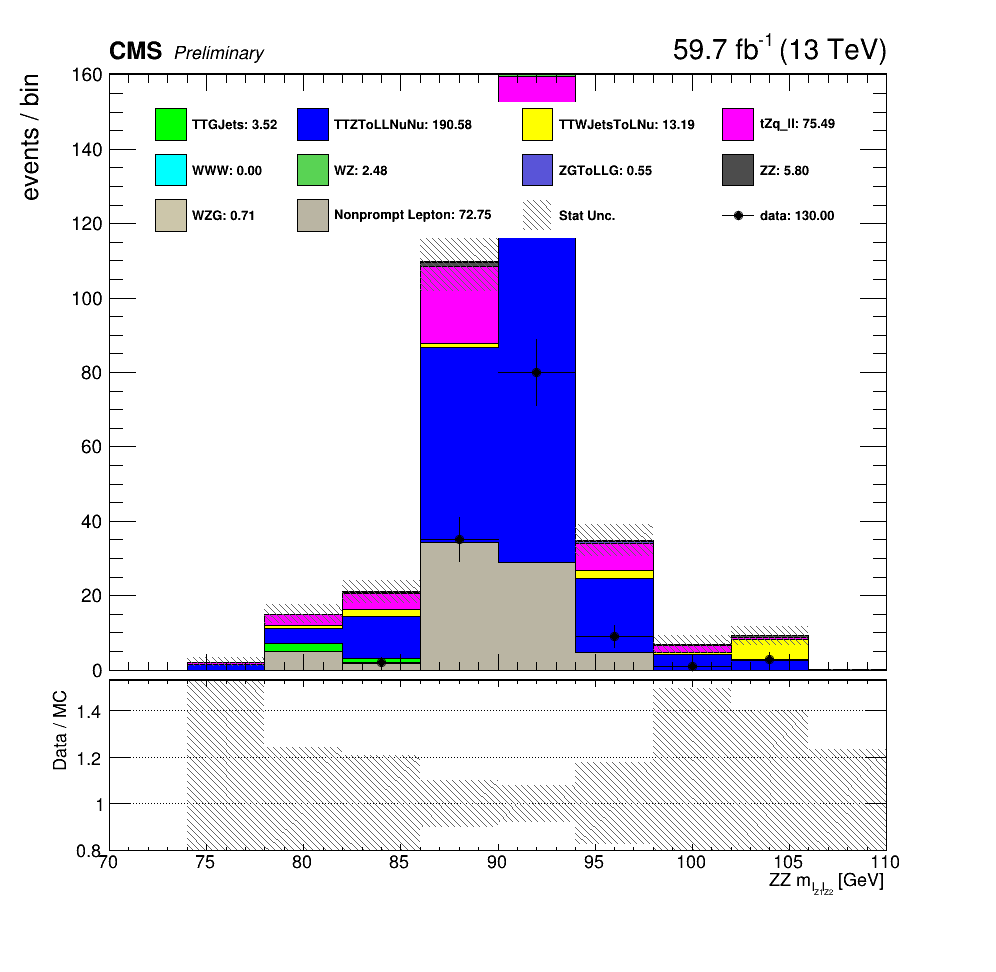

In [47]:
plot_branch = "ZZ_mllz1"

c1 = ROOT.TCanvas("","",1000,1000)

MC_err = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
MC_err.Sumw2()
MC_err.SetFillColor(ROOT.kGray+2)
MC_err.SetFillStyle(3345)
MC_err.SetMarkerSize(0.)
MC_err.SetMarkerColor(ROOT.kGray+2)
MC_err.SetLineWidth(2)
MC_err.SetLineColor(0)
MC_err.SetStats(0)

stack_mc = ROOT.THStack("","")
MC_err.Add(hist_FakeLep[plot_branch])
stack_mc.Add(hist_FakeLep[plot_branch])
for file in filelist_MC:
    stack_mc.Add(filelist_MC[file]["hist"][plot_branch])
    MC_err.Add(filelist_MC[file]["hist"][plot_branch])
    

legend = ROOT.TLegend(0.15, 0.65, 0.85, 0.85)
legend.SetNColumns(4)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.02)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
for file in filelist_MC:
    legend.AddEntry(filelist_MC[file]["hist"][plot_branch], f'{filelist_MC[file]["name"]}: {format(filelist_MC[file]["hist"][plot_branch].GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(hist_FakeLep[plot_branch],f'Nonprompt Lepton: {format(hist_FakeLep[plot_branch].GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(MC_err, 'Stat Unc.', 'F')
legend.AddEntry(hist_data[plot_branch], f'data: {format(hist_data[plot_branch].GetSumOfWeights(), ".2f")}')



c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

# draw everything
pad1.cd()
hist_data[plot_branch].Draw("ep")
# hist_data.SetMinimum(10)
hist_data[plot_branch].SetMaximum(2*hist_data[plot_branch].GetMaximum())
hist_data[plot_branch].GetXaxis().SetLabelSize(0)
stack_mc.Draw("HIST SAME")
MC_err.Draw("e2 SAME")
hist_data[plot_branch].Draw("ep SAME")
legend.Draw("SAME")
# ROOT.gPad.SetLogy()
ROOT.gPad.RedrawAxis()


# h1.GetXaxis().SetLabelSize(0)
pad2.cd()
h3 = createRatio(hist_data[plot_branch], MC_err)
h4 = createRatio(MC_err, MC_err)
h3.Draw("ep")
# h3.GetXaxis().SetRangeUser(10,60)
h4.Draw("e2 SAME")
ROOT.gPad.RedrawAxis()

CMS_lumi(pad1, 0, 0)
# c1.SaveAs('Fake_Lepton/MT_LooseMuon_dist_MR_2018.pdf')

In [51]:
# # file = '/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A.root'
file = '/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root'
# file = '/afs/cern.ch/work/s/sdeng/sftp/WZG/CMSSW_10_6_19/src/PhysicsTools/NanoAODTools/nanoAOD-WVG/FakeLepton/wza_UL18_sum_Skim.root'

# gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
# print (gen_branches)
    
init_branches = ['channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
init_branches = ['ZZ_mllz1','channel_mark']
    
# branch = 'LooseNotTightMuon_pt'

# init_branches.append(branch)
# init_branches.extend(gen_branches)
# print (init_branches)
        
init_time = time.time()
branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
end_time = time.time()
print ('%.2f' %(end_time-init_time))
branches
    

3.23


,ZZ_mllz1,channel_mark
0,99.354935,5
1,83.890007,6
2,0.000000,14
3,93.294044,8
4,0.000000,12
...,...,...
429,95.684570,8
430,90.373802,8
431,0.000000,14
432,0.000000,1
